<a href="https://colab.research.google.com/github/HWMV/AIFFEL_Quest1/blob/master/Project/CIFAR10_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10_model
## 10개의 이미지 클래스를 가지고 데이터들을 분류하는 모델을 만들어 보자!


## 1. 데이터 로드 및 전처리

In [40]:
# import
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model

In [41]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(train_data, train_labels), (x_test, y_test) = cifar10.load_data()

x_train_full, y_train_full = train_data, train_labels

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.2, random_state=2023)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [42]:
# class name

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-43-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


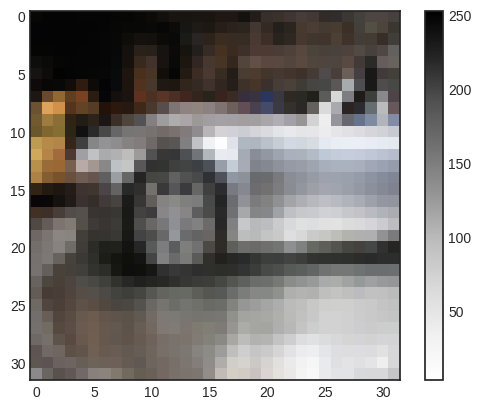

In [43]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [44]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [45]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
# x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
# x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
# x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_val = x_val.reshape(x_val.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [46]:
# 표준화, 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 2. 모델 구성 및 컴파일

In [47]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# 스스로 CNN 기법을 넣어 봤음
# L2 규제 적용
# lr(학습률) 적용
# [[YOUR CODE]]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(1024, activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# 모델 컴파일 (lr 조정 추가)
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 출력
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Ba  (None, 15, 15, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                      

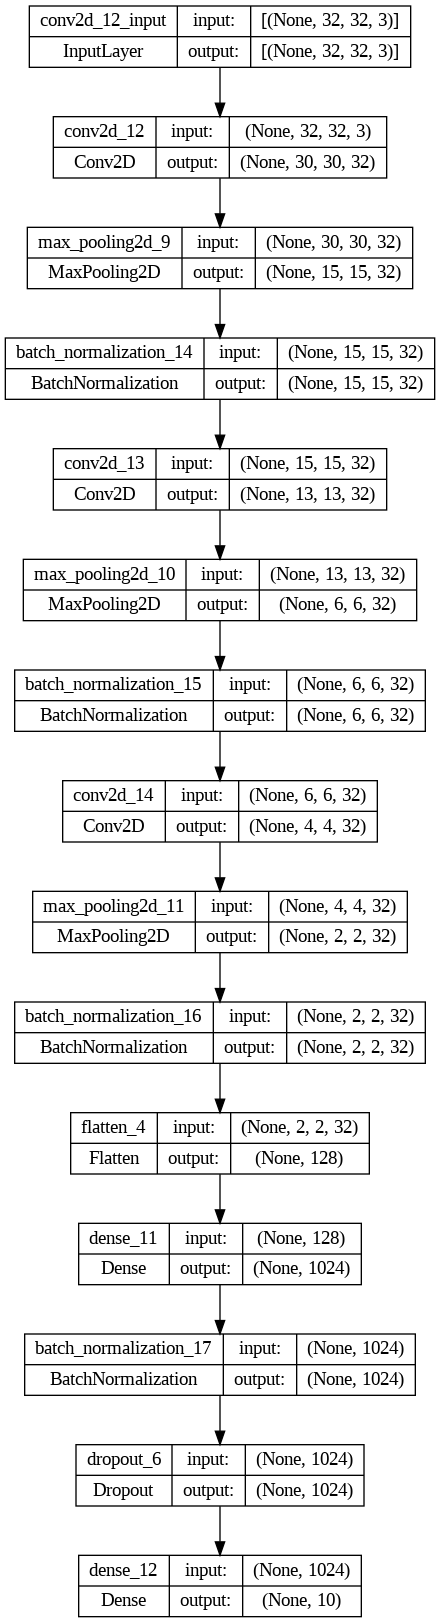

In [48]:
# Check model shape
plot_model(model, show_shapes=True)

## 3. 모델 학습

In [49]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint("best_model.h5",
                                   save_best_only=True,
                                   monitor='val_loss',
                                   verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               verbose=1)

# model fit
history = model.fit(x_train, y_train, epochs=20,
                    batch_size=64,
                    validation_data = (x_val, y_val),
                    callbacks=[model_checkpoint, early_stopping])
print("모델 학습이 완료되었습니다.")

Epoch 1/20
625/625 [==============================] - ETA: 0s - loss: 2.4625 - accuracy: 0.4233
Epoch 1: val_loss improved from inf to 2.07983, saving model to best_model.h5
625/625 [==============================] - 50s 77ms/step - loss: 2.4625 - accuracy: 0.4233 - val_loss: 2.0798 - val_accuracy: 0.4294
Epoch 2/20
  2/625 [..............................] - ETA: 36s - loss: 1.8479 - accuracy: 0.4922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - ETA: 0s - loss: 1.6764 - accuracy: 0.5498
Epoch 2: val_loss improved from 2.07983 to 1.67179, saving model to best_model.h5
625/625 [==============================] - 44s 70ms/step - loss: 1.6764 - accuracy: 0.5498 - val_loss: 1.6718 - val_accuracy: 0.5492
Epoch 3/20
625/625 [==============================] - ETA: 0s - loss: 1.4414 - accuracy: 0.5951
Epoch 3: val_loss improved from 1.67179 to 1.58135, saving model to best_model.h5
625/625 [==============================] - 45s 72ms/step - loss: 1.4414 - accuracy: 0.5951 - val_loss: 1.5814 - val_accuracy: 0.5506
Epoch 4/20
625/625 [==============================] - ETA: 0s - loss: 1.3037 - accuracy: 0.6206
Epoch 4: val_loss improved from 1.58135 to 1.55724, saving model to best_model.h5
625/625 [==============================] - 45s 72ms/step - loss: 1.3037 - accuracy: 0.6206 - val_loss: 1.5572 - val_accuracy: 0.5355
Epoch 5/20
625/625 [==============================] - ETA: 0s - loss: 1.2182 -

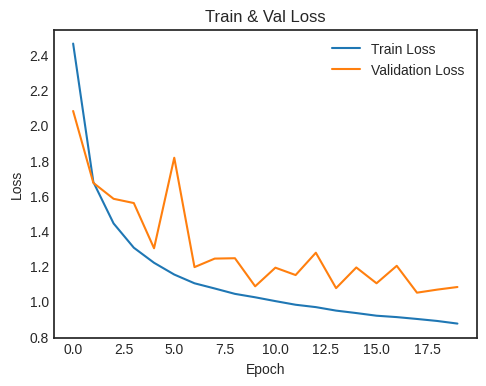

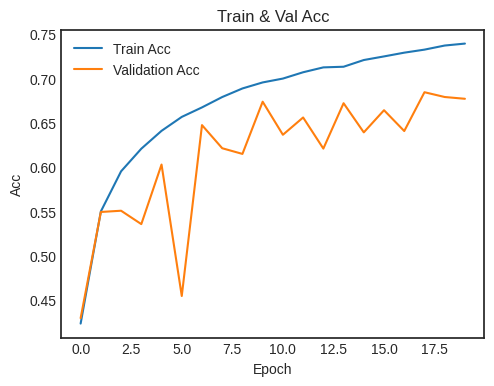

In [52]:
# 시각화
# history 에서 loss와 val_loss 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# history 에서 acc 와 val_acc 추출
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Train & Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# acc Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Validation Acc')
plt.legend()
plt.title('Train & Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')

plt.show()

## 4. 모델 평가 및 예측

In [53]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0766 - accuracy: 0.6815


[1.0766292810440063, 0.6815000176429749]